# Import required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import Data file

In [2]:
data = pd.read_csv('GlobalTemperatures.csv', encoding='utf-8', engine='python')

# Data Description

In [3]:
data.shape

(2592, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         2592 non-null   object 
 1   LandAverageTemperature                     2592 non-null   float64
 2   LandAverageTemperatureUncertainty          2592 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 182.4+ KB


In [5]:
data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1800-01-01,2.815,1.844,NaN,NaN,NaN,NaN,NaN,NaN
1,1800-02-01,3.634,2.600,NaN,NaN,NaN,NaN,NaN,NaN
2,1800-03-01,4.452,2.613,NaN,NaN,NaN,NaN,NaN,NaN
3,1800-04-01,9.125,2.168,NaN,NaN,NaN,NaN,NaN,NaN
4,1800-05-01,11.097,1.725,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,2592.000000,2592.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.413681,0.555524,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.303608,0.629147,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-1.385000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.326500,0.128750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.669500,0.292000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.559000,0.750250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,15.774000,4.545000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


# Handling missing values

In [7]:
data.isnull().sum()

dt                                             0
LandAverageTemperature                         0
LandAverageTemperatureUncertainty              0
LandMaxTemperature                           600
LandMaxTemperatureUncertainty                600
LandMinTemperature                           600
LandMinTemperatureUncertainty                600
LandAndOceanAverageTemperature               600
LandAndOceanAverageTemperatureUncertainty    600
dtype: int64

In [8]:
# Drop rows with missing values
data = data.dropna()

In [9]:
data.isnull().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [10]:
data.shape

(1992, 9)

# Changing file name

In [11]:
cleaned_data = data

# Convert 'dt' column to datetime format

In [12]:
# date column to date time format
cleaned_data['dt'] = pd.to_datetime(cleaned_data['dt'])

# ANALYTICAL QUESTIONS

# 1. What are the trends in global land temperatures over time?

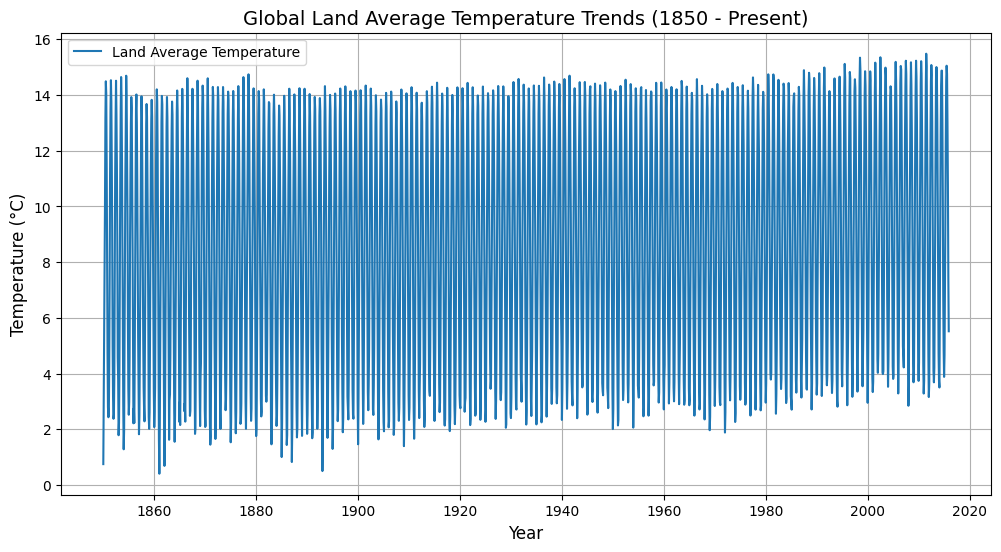

In [13]:
# Time-series line plot for global land temperature trends
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cleaned_data,
    x='dt',
    y='LandAverageTemperature',
    label='Land Average Temperature',
)
plt.title('Global Land Average Temperature Trends (1850 - Present)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 2. How has the average temperature changed by season?

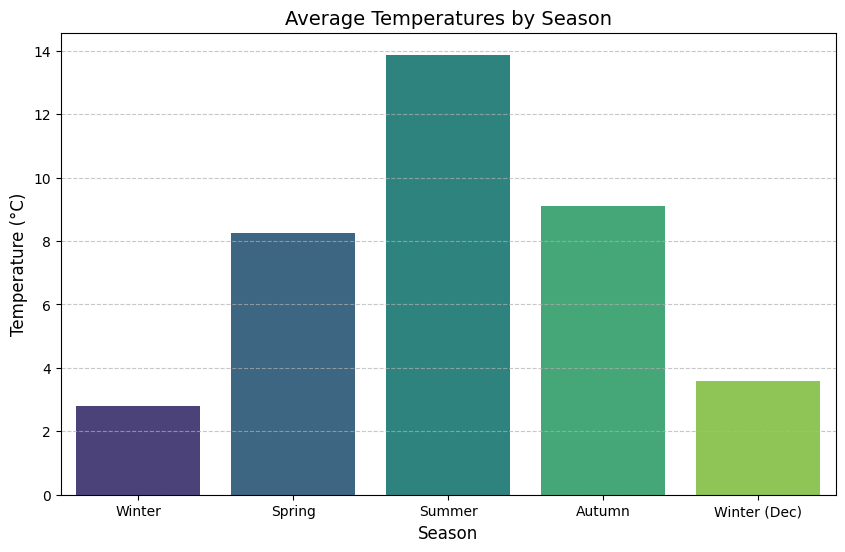

In [14]:
# Add year and month columns
cleaned_data['Year'] = cleaned_data['dt'].dt.year
cleaned_data['Month'] = cleaned_data['dt'].dt.month

# Define seasons and ensure unique labels for bins
cleaned_data['Season'] = pd.cut(
    cleaned_data['Month'],
    bins=[0, 2, 5, 8, 11, 12],
    labels=['Winter', 'Spring', 'Summer', 'Autumn', 'Winter (Dec)'],
    include_lowest=True
)

# Calculate seasonal average temperatures
seasonal_avg_temp = cleaned_data.groupby('Season')['LandAverageTemperature'].mean().reset_index()

# Bar chart for seasonal temperature averages
plt.figure(figsize=(10, 6))
sns.barplot(
    data=seasonal_avg_temp,
    x='Season',
    y='LandAverageTemperature',
    palette='viridis'
)
plt.title('Average Temperatures by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 3. What is the distribution of temperature uncertainties over the years?

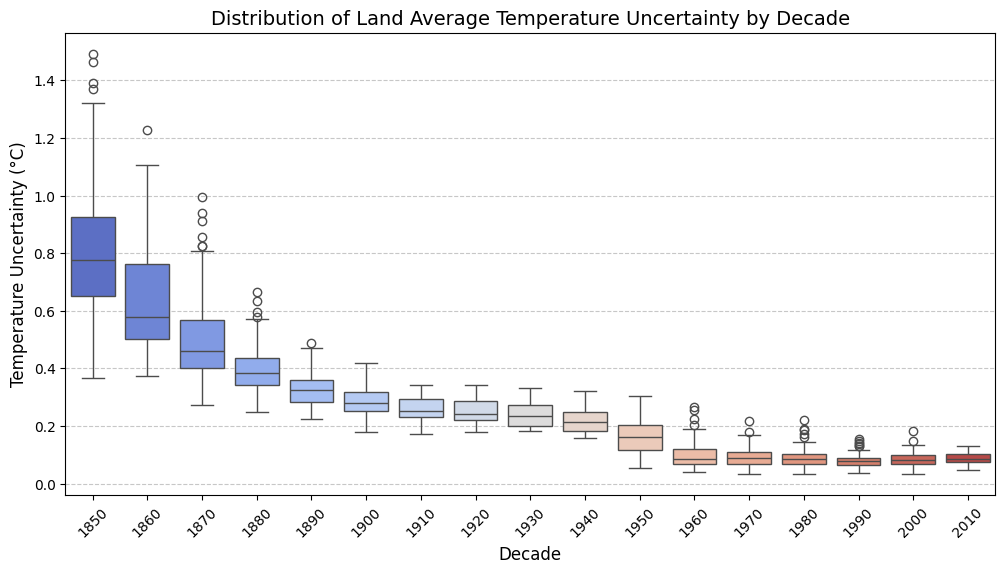

In [15]:
# Box plot for temperature uncertainty distribution over decades
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=cleaned_data['Year'] // 10 * 10,  # Group by decades for better readability
    y=cleaned_data['LandAverageTemperatureUncertainty'],
    palette='coolwarm'
)
plt.title('Distribution of Land Average Temperature Uncertainty by Decade', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Temperature Uncertainty (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 4. Which years experienced the highest average temperatures?

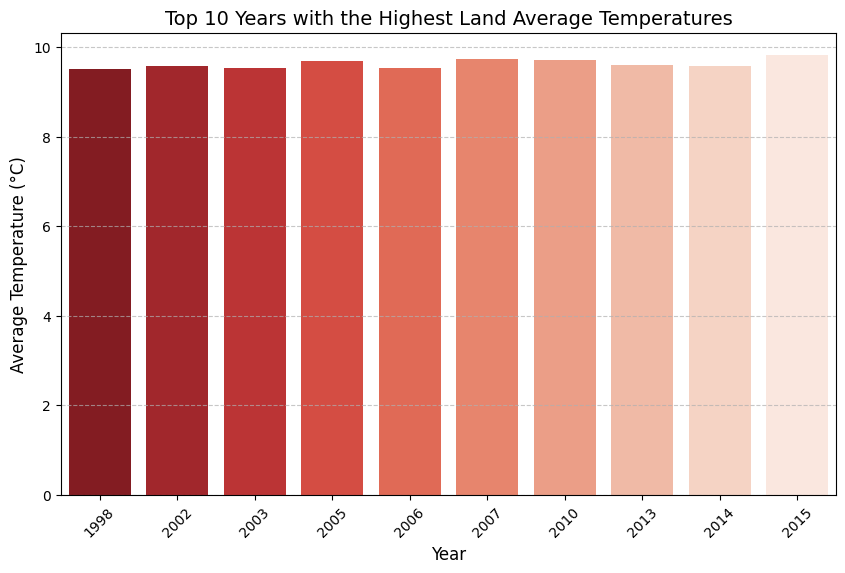

In [16]:
# Group by 'Year' and calculate the mean for numeric columns only
top_years = (
    cleaned_data.groupby('Year')
    .mean(numeric_only=True)  # Ensure only numeric columns are aggregated
    .sort_values(by='LandAverageTemperature', ascending=False)
    .head(10)
    .reset_index()
)

# Bar chart for top 10 years with the highest land average temperatures
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_years,
    x='Year',
    y='LandAverageTemperature',
    palette='Reds_r'
)
plt.title('Top 10 Years with the Highest Land Average Temperatures', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 5. What are the trends in the difference between land and ocean temperatures?

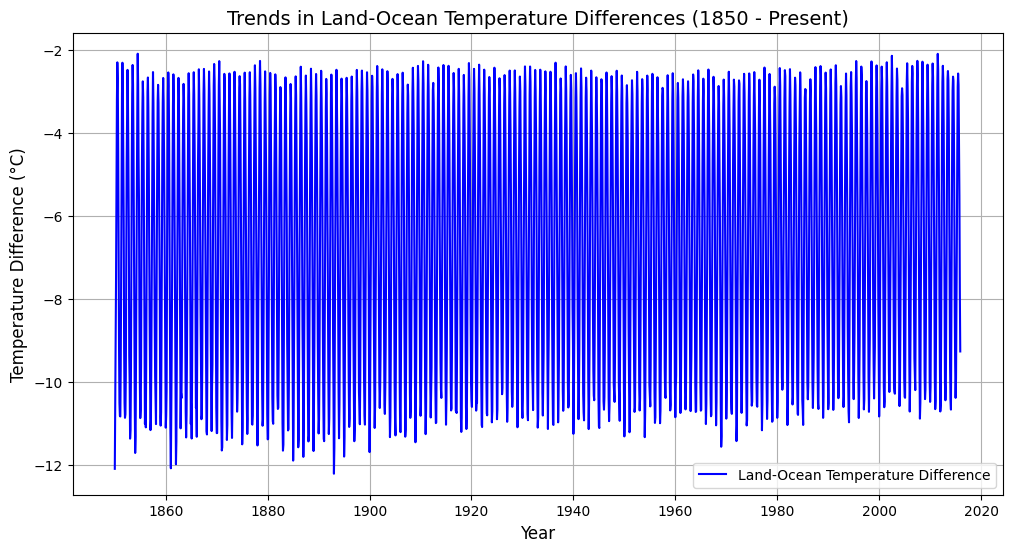

In [17]:
# Calculate the difference between land and ocean average temperatures
cleaned_data['LandOceanTempDifference'] = (
    cleaned_data['LandAverageTemperature'] - cleaned_data['LandAndOceanAverageTemperature']
)

# Plot the trend of land-ocean temperature differences over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cleaned_data,
    x='dt',
    y='LandOceanTempDifference',
    label='Land-Ocean Temperature Difference',
    color='blue'
)
plt.title('Trends in Land-Ocean Temperature Differences (1850 - Present)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Difference (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# 6. How do temperature extremes (maximum and minimum) compare over decades?

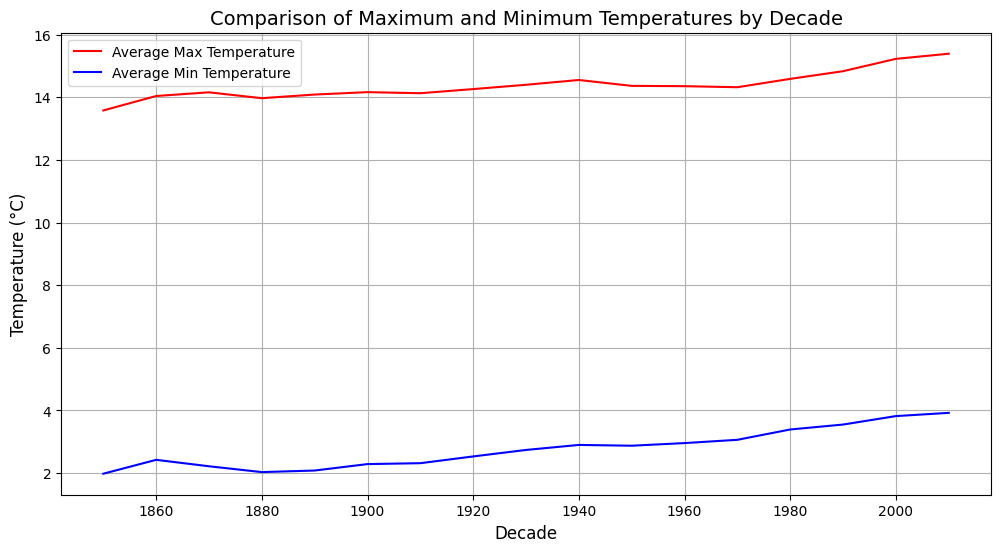

In [18]:
# Calculate decade averages for maximum and minimum temperatures
cleaned_data['Decade'] = (cleaned_data['Year'] // 10) * 10

# Group by decade and calculate averages for max and min temperatures
decade_extremes = cleaned_data.groupby('Decade').agg(
    AvgMaxTemperature=('LandMaxTemperature', 'mean'),
    AvgMinTemperature=('LandMinTemperature', 'mean')
).reset_index()

# Plot the trends for maximum and minimum temperatures
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=decade_extremes,
    x='Decade',
    y='AvgMaxTemperature',
    label='Average Max Temperature',
    color='red'
)
sns.lineplot(
    data=decade_extremes,
    x='Decade',
    y='AvgMinTemperature',
    label='Average Min Temperature',
    color='blue'
)
plt.title('Comparison of Maximum and Minimum Temperatures by Decade', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# 7. How does the uncertainty vary across maximum, minimum, and average temperatures?

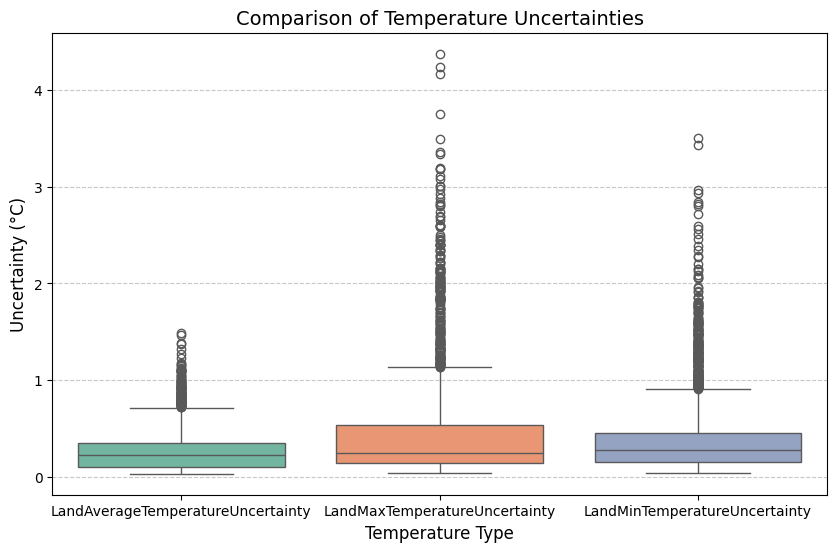

In [19]:
# Prepare the data for uncertainty comparison
uncertainty_data = cleaned_data[
    ['LandAverageTemperatureUncertainty',
     'LandMaxTemperatureUncertainty',
     'LandMinTemperatureUncertainty']
].melt(var_name='TemperatureType', value_name='Uncertainty')

# Box plot for uncertainties across temperature types
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=uncertainty_data,
    x='TemperatureType',
    y='Uncertainty',
    palette='Set2'
)
plt.title('Comparison of Temperature Uncertainties', fontsize=14)
plt.xlabel('Temperature Type', fontsize=12)
plt.ylabel('Uncertainty (°C)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 8. Is there a noticeable pattern in temperature increases during industrialization periods (e.g., post-1900)?

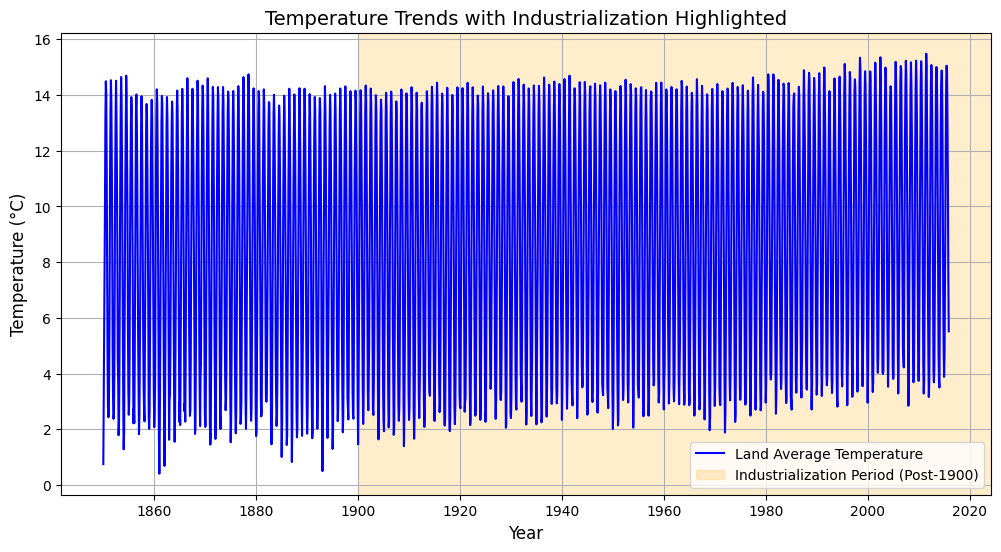

In [20]:
# Plot temperature trends with industrialization period highlighted
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cleaned_data,
    x='dt',
    y='LandAverageTemperature',
    label='Land Average Temperature',
    color='blue'
)

# Highlight the industrialization period (post-1900)
plt.axvspan(pd.to_datetime('1900-01-01'), pd.to_datetime('2025-01-01'), 
            color='orange', alpha=0.2, label='Industrialization Period (Post-1900)')

plt.title('Temperature Trends with Industrialization Highlighted', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# 9. What is the correlation between average temperatures and uncertainties?

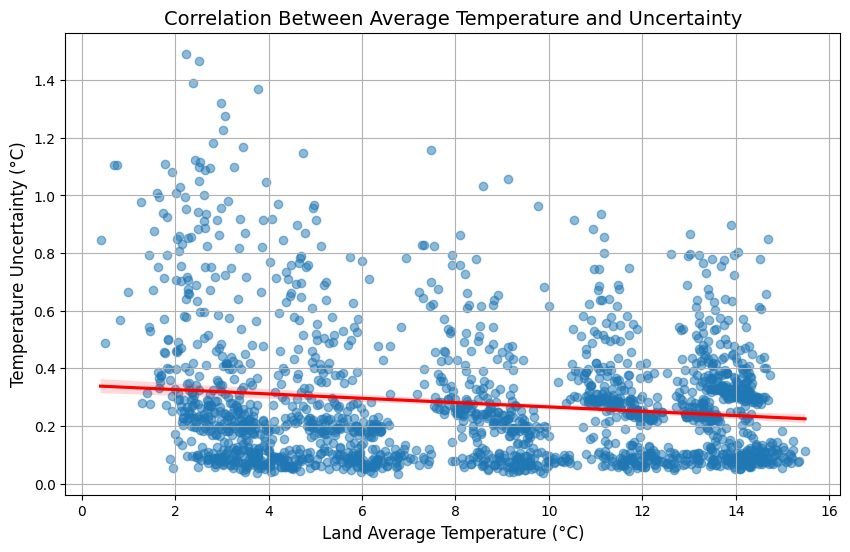

In [21]:
# Scatter plot with regression line to show the correlation
plt.figure(figsize=(10, 6))
sns.regplot(
    data=cleaned_data,
    x='LandAverageTemperature',
    y='LandAverageTemperatureUncertainty',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
)
plt.title('Correlation Between Average Temperature and Uncertainty', fontsize=14)
plt.xlabel('Land Average Temperature (°C)', fontsize=12)
plt.ylabel('Temperature Uncertainty (°C)', fontsize=12)
plt.grid(True)
plt.show()


# 10. What are the most significant anomalies in temperature trends (e.g., spikes or drops)?

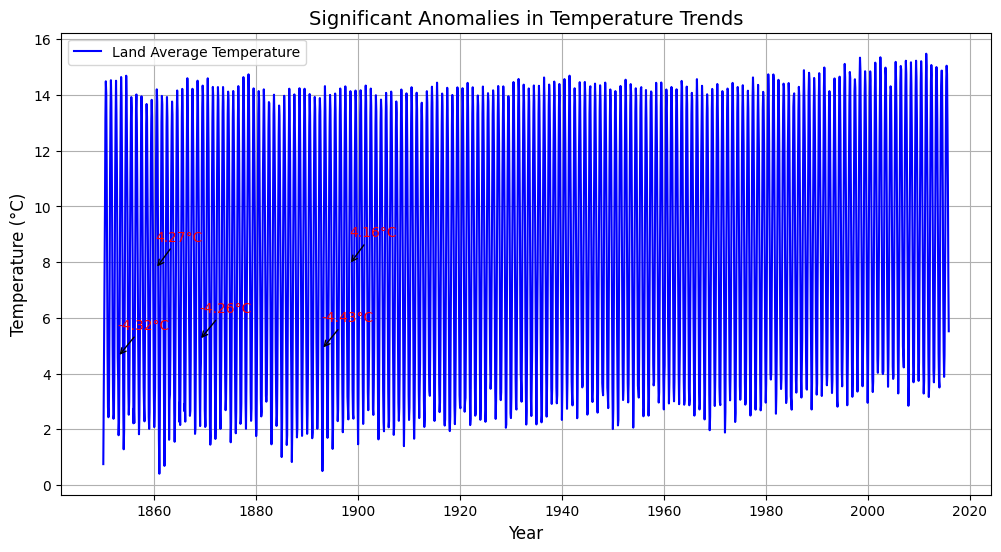

In [22]:
# Calculate the year-over-year difference in average temperature
cleaned_data['TemperatureChange'] = cleaned_data['LandAverageTemperature'].diff()

# Identify the top 5 anomalies (largest spikes and drops)
anomalies = cleaned_data.loc[
    cleaned_data['TemperatureChange'].abs().nlargest(5).index
]

# Plot the temperature trend with anomalies highlighted
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cleaned_data,
    x='dt',
    y='LandAverageTemperature',
    label='Land Average Temperature',
    color='blue'
)

# Highlight anomalies with annotations
for _, row in anomalies.iterrows():
    plt.annotate(
        f"{row['TemperatureChange']:.2f}°C",
        xy=(row['dt'], row['LandAverageTemperature']),
        xytext=(row['dt'], row['LandAverageTemperature'] + 1),
        arrowprops=dict(facecolor='red', arrowstyle='->'),
        fontsize=10,
        color='red'
    )

plt.title('Significant Anomalies in Temperature Trends', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# 11. How does temperature variability differ across decades?

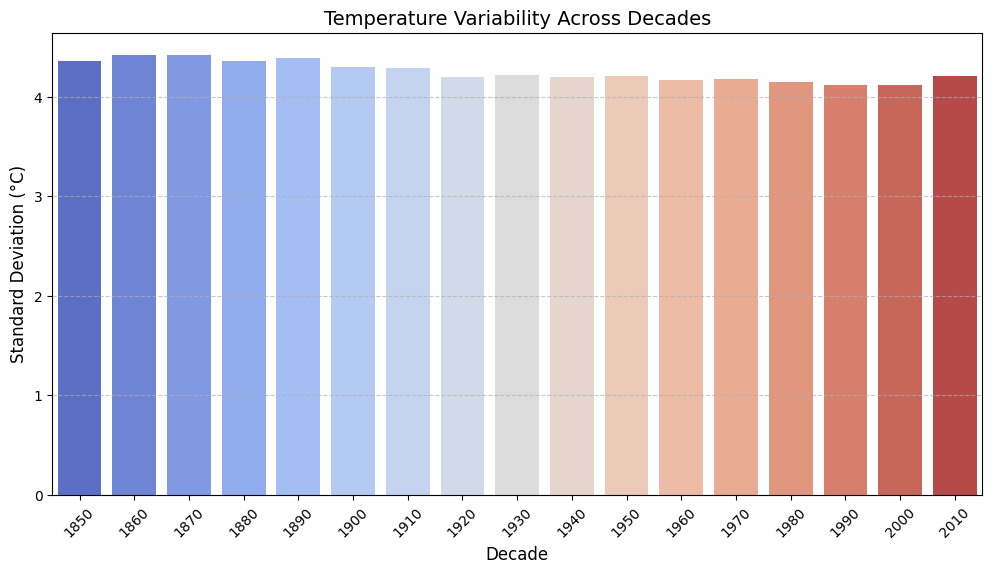

In [23]:
# Calculate the standard deviation of temperatures for each decade
temperature_variability = cleaned_data.groupby('Decade').agg(
    TemperatureStdDev=('LandAverageTemperature', 'std')
).reset_index()

# Plot temperature variability across decades
plt.figure(figsize=(12, 6))
sns.barplot(
    data=temperature_variability,
    x='Decade',
    y='TemperatureStdDev',
    palette='coolwarm'
)
plt.title('Temperature Variability Across Decades', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Standard Deviation (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 12. What is the relationship between temperature anomalies and time?

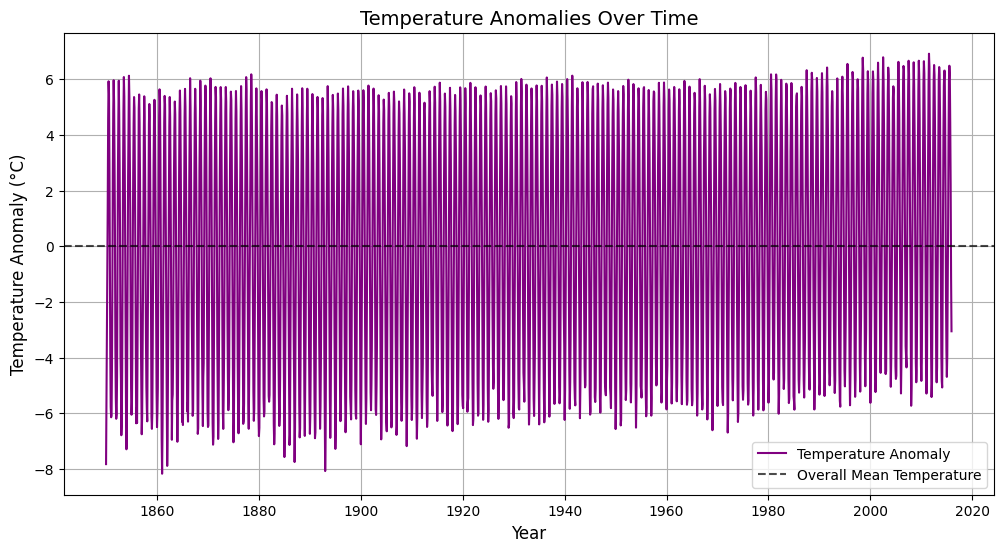

In [24]:
# Calculate temperature anomalies (deviation from overall mean)
overall_mean_temp = cleaned_data['LandAverageTemperature'].mean()
cleaned_data['TemperatureAnomaly'] = cleaned_data['LandAverageTemperature'] - overall_mean_temp

# Plot temperature anomalies over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cleaned_data,
    x='dt',
    y='TemperatureAnomaly',
    label='Temperature Anomaly',
    color='purple'
)
plt.axhline(0, color='black', linestyle='--', alpha=0.7, label='Overall Mean Temperature')
plt.title('Temperature Anomalies Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# 13. How has the seasonal temperature difference evolved over time?

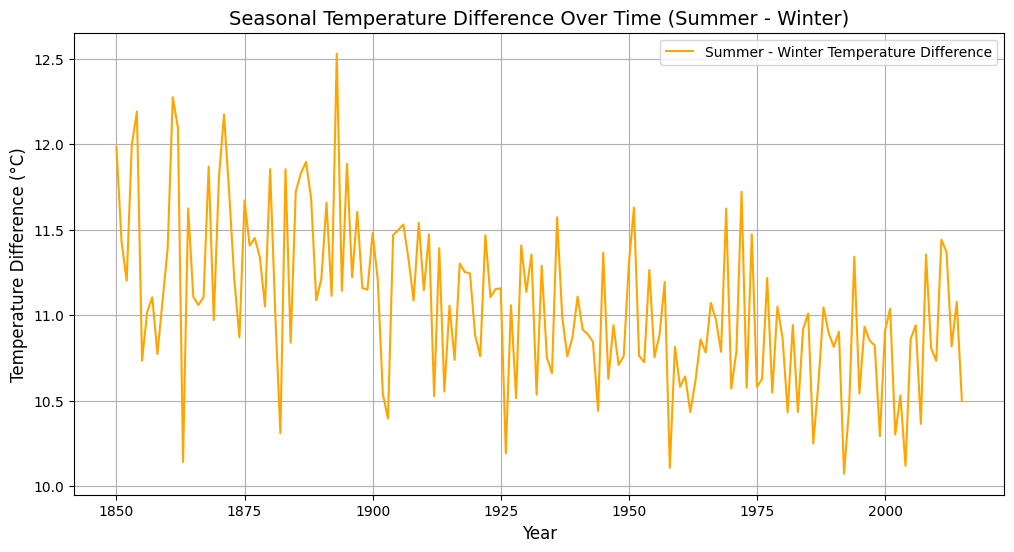

In [25]:
# Filter summer and winter data
summer_data = cleaned_data[cleaned_data['Season'] == 'Summer']
winter_data = cleaned_data[cleaned_data['Season'] == 'Winter']

# Calculate average temperatures for summer and winter by year
summer_avg = summer_data.groupby('Year')['LandAverageTemperature'].mean()
winter_avg = winter_data.groupby('Year')['LandAverageTemperature'].mean()

# Calculate the seasonal difference (summer - winter)
seasonal_diff = summer_avg - winter_avg

# Reset index for plotting
seasonal_diff = seasonal_diff.reset_index()
seasonal_diff.columns = ['Year', 'SeasonalDifference']

# Plot the seasonal difference over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=seasonal_diff,
    x='Year',
    y='SeasonalDifference',
    label='Summer - Winter Temperature Difference',
    color='orange'
)
plt.title('Seasonal Temperature Difference Over Time (Summer - Winter)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Difference (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# 14. What are the most significant cooling periods in the dataset?

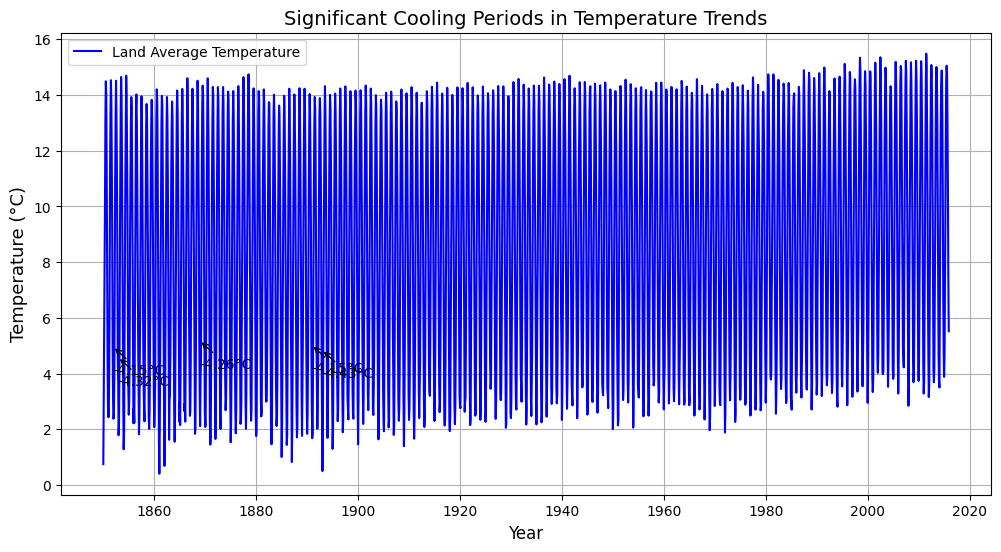

In [26]:
# Identify significant cooling periods (largest year-over-year temperature drops)
cooling_periods = cleaned_data.loc[
    cleaned_data['TemperatureChange'].nsmallest(5).index
]

# Plot the temperature trend with cooling periods highlighted
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cleaned_data,
    x='dt',
    y='LandAverageTemperature',
    label='Land Average Temperature',
    color='blue'
)

# Highlight significant cooling periods with annotations
for _, row in cooling_periods.iterrows():
    plt.annotate(
        f"{row['TemperatureChange']:.2f}°C",
        xy=(row['dt'], row['LandAverageTemperature']),
        xytext=(row['dt'], row['LandAverageTemperature'] - 1),
        arrowprops=dict(facecolor='blue', arrowstyle='->'),
        fontsize=10,
        color='black'
    )

plt.title('Significant Cooling Periods in Temperature Trends', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=13)
plt.grid(True)
plt.legend()
plt.show()


# 15. Is there a significant difference in average temperatures between pre- and post-1900?

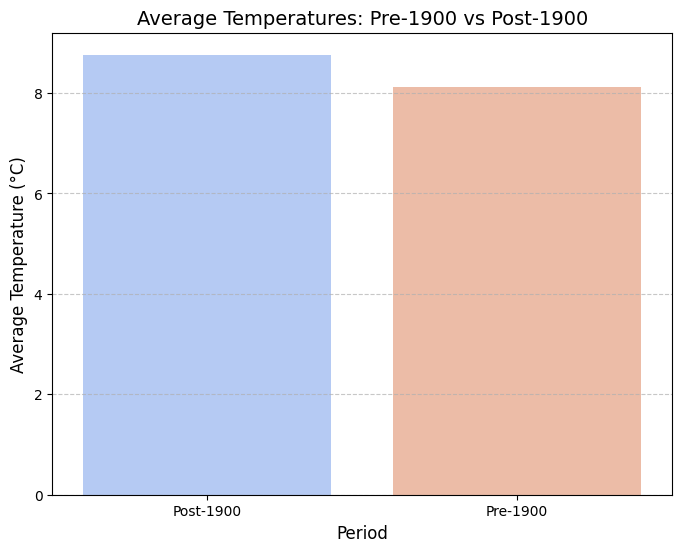

In [27]:
# Add a column to classify data as pre- or post-1900
cleaned_data['Period'] = ['Pre-1900' if year < 1900 else 'Post-1900' for year in cleaned_data['Year']]

# Calculate average temperatures for pre- and post-1900 periods
period_avg_temp = cleaned_data.groupby('Period')['LandAverageTemperature'].mean().reset_index()

# Plot the comparison of average temperatures
plt.figure(figsize=(8, 6))
sns.barplot(
    data=period_avg_temp,
    x='Period',
    y='LandAverageTemperature',
    palette='coolwarm'
)
plt.title('Average Temperatures: Pre-1900 vs Post-1900', fontsize=14)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
